# Segmenting and Clustering Neighborhoods in Hong Kong

https://www.censtatd.gov.hk/hkstat/sub/sp150_tc.jsp?productCode=FA100096


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import requests

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

## 1. Scrape the Wikipedia page and convert data into a DataFrame

Find the first table in the webpage, scrape all the data and store data in a DataFrame

In [3]:
"""
geolocator = Nominatim(user_agent="ny_explorer")

HK = pd.DataFrame(columns=['District', 'Latitude', 'Longitude'])
HK = pd.DataFrame({'District': ['Central and Western', 'Wan Chai', 'Eastern', 'Southern', 'Yau Tsim Mong', 'Sham Shui Po', 'Kowloon City', 'Wong Tai Sin', 'Kwun Tong', 'Kwai Tsing', \
                                'Tsuen Wan', 'Tuen Mun', 'Yuen Long', 'North', 'Tai Po', 'Sha Tin', 'Sai Kung', 'Islands']})
HK['Latitude'] = 0
HK['Longitude'] = 0

for i in range(HK.shape[0]):
    address = HK.loc[i,'District'] + ' District, Hong Kong'
    location = geolocator.geocode(address)
    HK.loc[i,'Latitude'] = location.latitude
    HK.loc[i,'Longitude'] = location.longitude

HK"""

,District,Latitude,Longitude
0,Central and Western,22.275246,114.148293
1,Wan Chai,22.273854,114.181767
2,Eastern,22.273280,114.233118
3,Southern,22.219484,114.225056
4,Yau Tsim Mong,22.307453,114.165202
5,Sham Shui Po,22.331079,114.159339
6,Kowloon City,22.321502,114.188696
7,Wong Tai Sin,22.344322,114.202174
8,Kwun Tong,22.308864,114.227766
9,Kwai Tsing,22.341333,114.104364


In [119]:
HK = pd.read_csv('https://raw.githubusercontent.com/psyyip/Coursera_Capstone/master/HK_statistics.csv')
HK = HK.dropna()
HK['Density'] = HK['Total Population'] / HK['Area (km2)']
bins = np.linspace(min(HK["Density"]), max(HK["Density"]), 6)
group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
HK['Density_bin'] = pd.cut(HK['Density'], bins, labels=group_names, include_lowest=True )
HK

,District,Latitude,Longitude,Female,Male,Total Population,0-14,15-24,45-64,25-44,65+,Median age,Area (km2),radius,Density,Density_bin
0,Central and Western,22.275246,114.148293,133900,107700,241600,23918,25368,76104,77554,38656,43,12.44,1.990423,19421.221865,Low
1,Wan Chai,22.273854,114.181767,101100,78300,179400,17761,15608,57408,59561,29242,44,9.83,1.769343,18250.254323,Low
2,Eastern,22.273280,114.233118,301600,244800,546400,63382,51908,167198,173755,90156,43,18.56,2.431219,29439.655172,Medium
3,Southern,22.219484,114.225056,145400,118500,263900,30612,25598,82073,84184,41432,43,38.85,3.517472,6792.792793,Very Low
4,Yau Tsim Mong,22.307453,114.165202,179800,153800,333600,37363,36362,102749,108086,49373,42,6.99,1.492017,47725.321888,Very High
5,Sham Shui Po,22.331079,114.159339,215600,185000,400600,49274,40461,122984,125788,61692,42,9.35,1.725603,42844.919786,High
6,Kowloon City,22.321502,114.188696,225800,186100,411900,47780,41602,127277,132220,62609,43,10.02,1.786360,41107.784431,High
7,Wong Tai Sin,22.344322,114.202174,224800,195800,420600,44584,45004,119871,137116,74026,45,9.30,1.720983,45225.806452,High
8,Kwun Tong,22.308864,114.227766,355300,308800,664100,79028,67738,195245,208527,113561,43,11.27,1.894511,58926.353150,Very High
9,Kwai Tsing,22.341333,114.104364,270400,237200,507600,58882,53806,152280,159894,82739,43,23.34,2.726375,21748.071979,Low


In [5]:
address = 'Hong Kong, China'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


In [6]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for dis, lat, lng in zip(HK['District'], HK['Latitude'], HK['Longitude']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 2. Clean the data

Remove row where Boroughs are "Not assigned". If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 

## 3. Build the structure in accordance with the instruction

Find the unique Postal Codes and then combine the Neighborhood if Borough is the same 

## 4. Download the geographical coordinates of a given postal code

The while loop does not stop. Read the geographical coordinates from the .csv file directly

## 5. Add the geographical coordinates of the neighborhoods by using the downloaded file

Use merge and inner join to add the latitude and longitude

## 6. Start segmenting and clustering neighborhoods 

Download the required libraries

## 7. Start exploring neighborhoods 

Define Foursquare Credentials and Version

In [59]:
# The code was removed by Watson Studio for sharing.

Explore neighborhoods in our dataframe by getting the top 100 venues that are in neighborhoods within a radius of 500 meters

In [77]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng, rad in zip(names, latitudes, longitudes, radius):
        print(name)
        rad = rad *1000
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            LIMIT)
        print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results[0:4])
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            #v['venue']['location']['state'],  
            v['venue']['categories'][0]['name']) for v in results])
                
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    
    nearby_venues.columns = ['District', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  #'Venue District',
                  'Venue Category']
        
    return(nearby_venues)   

For some reason, 3 neighborhoods are not returned

In [78]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
HK_venues = getNearbyVenues(names=HK['District'],
                                   latitudes=HK['Latitude'],
                                   longitudes=HK['Longitude'],
                                   radius=HK['radius']
                                  )

Central and Western
https://api.foursquare.com/v2/venues/explore?&client_id=MH14JANCZTRR1VW1GWZI1ZF00GRA0TTU3HV1STPPIVDOUZG0&client_secret=4ACG1MYJL4XDHW4NY1KTYDW1UOQIDZZDH1DAQYZK1L55XC3U&v=20180605&ll=22.275246,114.148293&radius=1990.42293&limit=100
Wan Chai
https://api.foursquare.com/v2/venues/explore?&client_id=MH14JANCZTRR1VW1GWZI1ZF00GRA0TTU3HV1STPPIVDOUZG0&client_secret=4ACG1MYJL4XDHW4NY1KTYDW1UOQIDZZDH1DAQYZK1L55XC3U&v=20180605&ll=22.273854,114.181767&radius=1769.342603&limit=100
Eastern
https://api.foursquare.com/v2/venues/explore?&client_id=MH14JANCZTRR1VW1GWZI1ZF00GRA0TTU3HV1STPPIVDOUZG0&client_secret=4ACG1MYJL4XDHW4NY1KTYDW1UOQIDZZDH1DAQYZK1L55XC3U&v=20180605&ll=22.27328,114.23311799999999&radius=2431.219452&limit=100
Southern
https://api.foursquare.com/v2/venues/explore?&client_id=MH14JANCZTRR1VW1GWZI1ZF00GRA0TTU3HV1STPPIVDOUZG0&client_secret=4ACG1MYJL4XDHW4NY1KTYDW1UOQIDZZDH1DAQYZK1L55XC3U&v=20180605&ll=22.219484,114.22505600000001&radius=3517.472312&limit=100
Yau Tsim Mon

In [79]:
print(HK_venues.shape)
print(HK_venues.head())
print(HK_venues.groupby('District').count().head(5))
print('\nThere are {} uniques categories.'.format(len(HK_venues['Venue Category'].unique())))

(1311, 7)
              District  Neighborhood Latitude  Neighborhood Longitude  \
0  Central and Western              22.275246              114.148293   
1  Central and Western              22.275246              114.148293   
2  Central and Western              22.275246              114.148293   
3  Central and Western              22.275246              114.148293   
4  Central and Western              22.275246              114.148293   

                                  Venue  Venue Latitude  Venue Longitude  \
0       Morning Trail, The Peak (山頂晨運徑)       22.278008       114.144432   
1                   Victoria Peak (太平山)       22.271280       114.149976   
2       The Sky Terrace 428 (凌霄閣摩天臺428)       22.271304       114.149991   
3  Hong Kong Trail (Section 1) 港島徑（第一段）       22.272874       114.145895   
4           Victoria Peak Garden (山頂公園)       22.273937       114.143373   

   Venue Category  
0           Trail  
1  Scenic Lookout  
2  Scenic Lookout  
3           Tr

In [80]:
HK_venues

,District,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.275246,114.148293,"Morning Trail, The Peak (山頂晨運徑)",22.278008,114.144432,Trail
1,Central and Western,22.275246,114.148293,Victoria Peak (太平山),22.271280,114.149976,Scenic Lookout
2,Central and Western,22.275246,114.148293,The Sky Terrace 428 (凌霄閣摩天臺428),22.271304,114.149991,Scenic Lookout
3,Central and Western,22.275246,114.148293,Hong Kong Trail (Section 1) 港島徑（第一段）,22.272874,114.145895,Trail
4,Central and Western,22.275246,114.148293,Victoria Peak Garden (山頂公園),22.273937,114.143373,Garden
5,Central and Western,22.275246,114.148293,Madame Tussauds (杜莎夫人蠟像館),22.271400,114.149970,Art Gallery
6,Central and Western,22.275246,114.148293,The Old Man,22.282770,114.151774,Bar
7,Central and Western,22.275246,114.148293,Stockton Hong Kong,22.280038,114.155472,Bar
8,Central and Western,22.275246,114.148293,Pure Fitness,22.281976,114.153248,Gym / Fitness Center
9,Central and Western,22.275246,114.148293,Pure Yoga,22.280698,114.154960,Yoga Studio


In [81]:
HK_venues.groupby('District').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Central and Western,100,100,100,100,100,100
Eastern,100,100,100,100,100,100
Islands,47,47,47,47,47,47
Kowloon City,100,100,100,100,100,100
Kwai Tsing,51,51,51,51,51,51
Kwun Tong,74,74,74,74,74,74
North,23,23,23,23,23,23
Sai Kung,6,6,6,6,6,6
Sha Tin,100,100,100,100,100,100


## 8. Analyze each neighborhood

Each row is one venue

In [82]:
# one hot encoding
#the venue category of index 436,312,1177,1093 are "neighborhood"
#print(Toronto_venues[['Venue Category']].sort_values(by='Venue Category',axis=0))
HK_onehot = pd.get_dummies(HK_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe. Have to renamed it to "Neighborhoods" as there is a venue cateogry called "Neighborhood"
HK_onehot['District'] = HK_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [HK_onehot.columns[-1]] + list(HK_onehot.columns[:-1])
HK_onehot = HK_onehot[fixed_columns]

print(HK_onehot.shape)
HK_onehot.head()

(1311, 202)


,District,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Store,Beijing Restaurant,Bistro,Bookstore,Brazilian Restaurant,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Campground,Cantonese Restaurant,Cave,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cultural Center,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donburi Restaurant,Dumpling Restaurant,Electronics Store,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Light Rail Station,Lingerie Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,Noodle House,Other Great Outdoors,Pakistani Restaurant,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racecourse,Ramen Restaurant,Record Shop,Reservoir,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shopping Mall,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central and Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Central and Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [83]:
HK_grouped = HK_onehot.groupby('District').mean().reset_index()
print(HK_grouped.head)
print(HK_grouped.shape)

<bound method NDFrame.head of                District  American Restaurant  Argentinian Restaurant  \
0   Central and Western             0.000000                    0.01   
1               Eastern             0.000000                    0.00   
2               Islands             0.000000                    0.00   
3          Kowloon City             0.000000                    0.00   
4            Kwai Tsing             0.000000                    0.00   
5             Kwun Tong             0.000000                    0.00   
6                 North             0.043478                    0.00   
7              Sai Kung             0.000000                    0.00   
8               Sha Tin             0.000000                    0.00   
9          Sham Shui Po             0.000000                    0.00   
10             Southern             0.000000                    0.00   
11               Tai Po             0.000000                    0.00   
12            Tsuen Wan           

Print each neighborhood along with the top 5 most common venues

In [85]:
num_top_venues = 10

for hood in HK_grouped['District']:
    print("----"+hood+"----")
    temp = HK_grouped[HK_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    # do not need the first title row
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western----
                           venue  freq
0            Japanese Restaurant  0.07
1                   Cocktail Bar  0.07
2                            Bar  0.05
3              French Restaurant  0.04
4                    Coffee Shop  0.04
5  Vegetarian / Vegan Restaurant  0.04
6                    Art Gallery  0.03
7                    Yoga Studio  0.03
8             Italian Restaurant  0.03
9                           Café  0.02


----Eastern----
                   venue  freq
0     Chinese Restaurant  0.07
1   Fast Food Restaurant  0.05
2    Japanese Restaurant  0.04
3       Department Store  0.04
4            Coffee Shop  0.04
5     Seafood Restaurant  0.04
6   Hong Kong Restaurant  0.04
7                   Park  0.04
8  Vietnamese Restaurant  0.03
9   Cantonese Restaurant  0.03


----Islands----
                venue  freq
0               Beach  0.15
1  Seafood Restaurant  0.09
2               Trail  0.06
3                Café  0.06
4            Mountain  0.0

## 9. Put that into a pandas dataframe

Write a function to sort the venues in descending order.

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [158]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = HK_grouped['District']

for ind in np.arange(HK_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HK_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Cocktail Bar,Japanese Restaurant,Bar,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Yoga Studio,Art Gallery,Gym / Fitness Center
1,Eastern,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Park,Department Store,Coffee Shop,Seafood Restaurant,Hong Kong Restaurant,Vietnamese Restaurant,Trail
2,Islands,Beach,Seafood Restaurant,Café,Trail,Cave,Chinese Restaurant,Asian Restaurant,Coffee Shop,Mountain,Soccer Field
3,Kowloon City,Thai Restaurant,Dessert Shop,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Noodle House,Hotel,Cha Chaan Teng,Park,Café
4,Kwai Tsing,Chinese Restaurant,Fast Food Restaurant,Park,Shopping Mall,Tunnel,Bus Station,Clothing Store,Sushi Restaurant,Metro Station,Café
5,Kwun Tong,Chinese Restaurant,Coffee Shop,Park,Café,Cruise,Shopping Mall,Cha Chaan Teng,Hong Kong Restaurant,Hotel,Dessert Shop
6,North,Coffee Shop,BBQ Joint,Thai Restaurant,Trail,American Restaurant,Farm,Fast Food Restaurant,Shopping Mall,Snack Place,Convenience Store
7,Sai Kung,Harbor / Marina,Seafood Restaurant,Lake,Park,Zoo,Food Court,General Entertainment,Gastropub,Gas Station,Garden
8,Sha Tin,Chinese Restaurant,Café,Train Station,Fast Food Restaurant,Coffee Shop,Park,Hotel,Cantonese Restaurant,Dessert Shop,Shopping Mall
9,Sham Shui Po,Dessert Shop,Noodle House,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Café,Malay Restaurant,Italian Restaurant,Shopping Mall


In [118]:
# The code was removed by Watson Studio for sharing.

## 10. Put that into a pandas dataframe
Run k-means to cluster the neighborhood into 5 clusters.

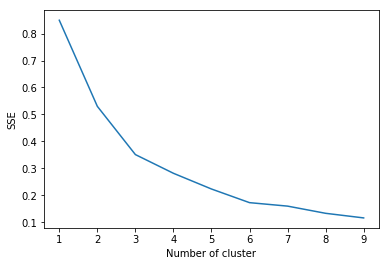

In [159]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(HK_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [161]:
# set number of clusters
kclusters = 8

HK_grouped_clustering = HK_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_grouped_clustering)

# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

HK_merged = HK[['District', 'Latitude', 'Longitude', 'Density_bin']]
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood. Need to use how=right to make sure the cluster label is integer
HK_merged = HK_merged.join(district_venues_sorted.set_index('District'), on='District')

HK_merged

,District,Latitude,Longitude,Density_bin,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,22.275246,114.148293,Low,6,Cocktail Bar,Japanese Restaurant,Bar,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Yoga Studio,Art Gallery,Gym / Fitness Center
1,Wan Chai,22.273854,114.181767,Low,6,Japanese Restaurant,Cantonese Restaurant,Thai Restaurant,Hotel,Korean Restaurant,Szechuan Restaurant,Sushi Restaurant,Hotpot Restaurant,Bakery,Seafood Restaurant
2,Eastern,22.273280,114.233118,Medium,5,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Park,Department Store,Coffee Shop,Seafood Restaurant,Hong Kong Restaurant,Vietnamese Restaurant,Trail
3,Southern,22.219484,114.225056,Very Low,3,Café,Beach,Trail,Pizza Place,Bus Stop,BBQ Joint,Noodle House,Surf Spot,Mediterranean Restaurant,Reservoir
4,Yau Tsim Mong,22.307453,114.165202,Very High,7,Hotel,Chinese Restaurant,Café,Dessert Shop,Coffee Shop,Japanese Restaurant,Shopping Mall,Spa,History Museum,Toy / Game Store
5,Sham Shui Po,22.331079,114.159339,High,7,Dessert Shop,Noodle House,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Café,Malay Restaurant,Italian Restaurant,Shopping Mall
6,Kowloon City,22.321502,114.188696,High,7,Thai Restaurant,Dessert Shop,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Noodle House,Hotel,Cha Chaan Teng,Park,Café
7,Wong Tai Sin,22.344322,114.202174,High,5,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Coffee Shop,Park,Cantonese Restaurant,Vietnamese Restaurant,Garden,Bus Stop,Asian Restaurant
8,Kwun Tong,22.308864,114.227766,Very High,5,Chinese Restaurant,Coffee Shop,Park,Café,Cruise,Shopping Mall,Cha Chaan Teng,Hong Kong Restaurant,Hotel,Dessert Shop
9,Kwai Tsing,22.341333,114.104364,Low,5,Chinese Restaurant,Fast Food Restaurant,Park,Shopping Mall,Tunnel,Bus Station,Clothing Store,Sushi Restaurant,Metro Station,Café


Visualize the resulting clusters

In [171]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#len(ys) is the number of color
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HK_merged['Latitude'], HK['Longitude'], HK_merged['District'], HK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.0).add_to(map_clusters)
       
map_clusters

## 11. Examine Clusters
Examine each cluster and determine the discriminating venue categories that distinguish each cluster

### Cluster 0 (Has lots of baseball field)

In [163]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 0, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 0, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(3, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Tuen Mun,Seafood Restaurant,Shopping Mall,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Train Station,Hong Kong Restaurant,Italian Restaurant,Park,Cantonese Restaurant
12,Yuen Long,Chinese Restaurant,Fast Food Restaurant,Noodle House,Shopping Mall,Coffee Shop,Hong Kong Restaurant,Dessert Shop,Train Station,Pizza Place,Café
15,Sha Tin,Chinese Restaurant,Café,Train Station,Fast Food Restaurant,Coffee Shop,Park,Hotel,Cantonese Restaurant,Dessert Shop,Shopping Mall


### Cluster 1 (Has lots of baseball field)

In [164]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 1, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 1, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(1, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Sai Kung,Harbor / Marina,Seafood Restaurant,Lake,Park,Zoo,Food Court,General Entertainment,Gastropub,Gas Station,Garden


### Cluster 2 (Has lots of restaurants and coffee shops)

In [165]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 2, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 2, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(1, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Tai Po,Pier,Park,Reservoir,Harbor / Marina,Beach,Hong Kong Restaurant,Zoo,Food Truck,General Entertainment,Gastropub


### Cluster 3 (Has lots of garden)

In [166]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 3, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 3, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(2, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Southern,Café,Beach,Trail,Pizza Place,Bus Stop,BBQ Joint,Noodle House,Surf Spot,Mediterranean Restaurant,Reservoir
17,Islands,Beach,Seafood Restaurant,Café,Trail,Cave,Chinese Restaurant,Asian Restaurant,Coffee Shop,Mountain,Soccer Field


### Cluster 4 (Has lot of banks)

In [167]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 4, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 4, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(1, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,North,Coffee Shop,BBQ Joint,Thai Restaurant,Trail,American Restaurant,Farm,Fast Food Restaurant,Shopping Mall,Snack Place,Convenience Store


### Cluster 5 (nothing)

In [168]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 5, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 5, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(5, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Eastern,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Park,Department Store,Coffee Shop,Seafood Restaurant,Hong Kong Restaurant,Vietnamese Restaurant,Trail
7,Wong Tai Sin,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Coffee Shop,Park,Cantonese Restaurant,Vietnamese Restaurant,Garden,Bus Stop,Asian Restaurant
8,Kwun Tong,Chinese Restaurant,Coffee Shop,Park,Café,Cruise,Shopping Mall,Cha Chaan Teng,Hong Kong Restaurant,Hotel,Dessert Shop
9,Kwai Tsing,Chinese Restaurant,Fast Food Restaurant,Park,Shopping Mall,Tunnel,Bus Station,Clothing Store,Sushi Restaurant,Metro Station,Café
10,Tsuen Wan,Chinese Restaurant,Coffee Shop,Shopping Mall,Park,Dessert Shop,Noodle House,Hotel,Fast Food Restaurant,Cha Chaan Teng,Sushi Restaurant


### Cluster 6 (nothing)

In [169]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 6, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 6, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(2, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Cocktail Bar,Japanese Restaurant,Bar,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Yoga Studio,Art Gallery,Gym / Fitness Center
1,Wan Chai,Japanese Restaurant,Cantonese Restaurant,Thai Restaurant,Hotel,Korean Restaurant,Szechuan Restaurant,Sushi Restaurant,Hotpot Restaurant,Bakery,Seafood Restaurant


### Cluster 7 (nothing)

In [170]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 7, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 7, HK_merged.columns[[0] + list(range(5, HK_merged.shape[1]))]]

(3, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Yau Tsim Mong,Hotel,Chinese Restaurant,Café,Dessert Shop,Coffee Shop,Japanese Restaurant,Shopping Mall,Spa,History Museum,Toy / Game Store
5,Sham Shui Po,Dessert Shop,Noodle House,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Café,Malay Restaurant,Italian Restaurant,Shopping Mall
6,Kowloon City,Thai Restaurant,Dessert Shop,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Noodle House,Hotel,Cha Chaan Teng,Park,Café
